In [1]:
import numpy as np
from math import exp  

def sigmoid(alpha, z):
    return 1/(1+exp(-alpha*(z)))

import matplotlib.pyplot as plt 

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
import matplotlib.pyplot as plt 

In [167]:
W = np.arange(0,0.4,0.001)
T = np.arange(0,0.4,0.001)
ww, tt = np.meshgrid(W, T)
ww,tt

(array([[0.   , 0.001, 0.002, ..., 0.397, 0.398, 0.399],
        [0.   , 0.001, 0.002, ..., 0.397, 0.398, 0.399],
        [0.   , 0.001, 0.002, ..., 0.397, 0.398, 0.399],
        ...,
        [0.   , 0.001, 0.002, ..., 0.397, 0.398, 0.399],
        [0.   , 0.001, 0.002, ..., 0.397, 0.398, 0.399],
        [0.   , 0.001, 0.002, ..., 0.397, 0.398, 0.399]]),
 array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001],
        [0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002],
        ...,
        [0.397, 0.397, 0.397, ..., 0.397, 0.397, 0.397],
        [0.398, 0.398, 0.398, ..., 0.398, 0.398, 0.398],
        [0.399, 0.399, 0.399, ..., 0.399, 0.399, 0.399]]))

In [168]:
X = np.arange(0,1,0.001)
Y = np.array([0]*len(X))
w_star = 0.5
Y[X>w_star] = 1

w_hat = 0.25

Y_hat = np.array([0]*len(X))
Y_hat[X>w_hat] = 1

def g(w,x):
    return (w-x)**2
    #return abs(w-x)
    #return 1/(1+np.exp(abs(w-x)))

def err_cov(scores, Y, Y_hat,t,y=1):
    idx = np.arange(0,len(scores),1)
    idx_ = idx[(scores>=t) & (Y_hat==y)]
    cov = len(idx_)/len(idx) 
    err =  np.sum(Y_hat[idx_]!=Y[idx_])/(len(idx_)+1)

    return err, cov 

E2,C2 = np.zeros(ww.shape),np.zeros(ww.shape)

for i in range(len(ww)):
    for j in range(len(tt)):
        w = ww[i][j]
        t = tt[i][j] 
        
        scores = np.array([g(w,x) for x in X])
        err,cov = err_cov(scores,Y,Y_hat,t,y=1)
        E2[i][j] = err
        C2[i][j] = cov
        print(w,t,err, cov) 



0.0 0.0 0.3333333333333333 0.749
0.001 0.0 0.3333333333333333 0.749
0.002 0.0 0.3333333333333333 0.749
0.003 0.0 0.3333333333333333 0.749
0.004 0.0 0.3333333333333333 0.749
0.005 0.0 0.3333333333333333 0.749
0.006 0.0 0.3333333333333333 0.749
0.007 0.0 0.3333333333333333 0.749
0.008 0.0 0.3333333333333333 0.749
0.009000000000000001 0.0 0.3333333333333333 0.749
0.01 0.0 0.3333333333333333 0.749
0.011 0.0 0.3333333333333333 0.749
0.012 0.0 0.3333333333333333 0.749
0.013000000000000001 0.0 0.3333333333333333 0.749
0.014 0.0 0.3333333333333333 0.749
0.015 0.0 0.3333333333333333 0.749
0.016 0.0 0.3333333333333333 0.749
0.017 0.0 0.3333333333333333 0.749
0.018000000000000002 0.0 0.3333333333333333 0.749
0.019 0.0 0.3333333333333333 0.749
0.02 0.0 0.3333333333333333 0.749
0.021 0.0 0.3333333333333333 0.749
0.022 0.0 0.3333333333333333 0.749
0.023 0.0 0.3333333333333333 0.749
0.024 0.0 0.3333333333333333 0.749
0.025 0.0 0.3333333333333333 0.749
0.026000000000000002 0.0 0.3333333333333333 0.749

0.525


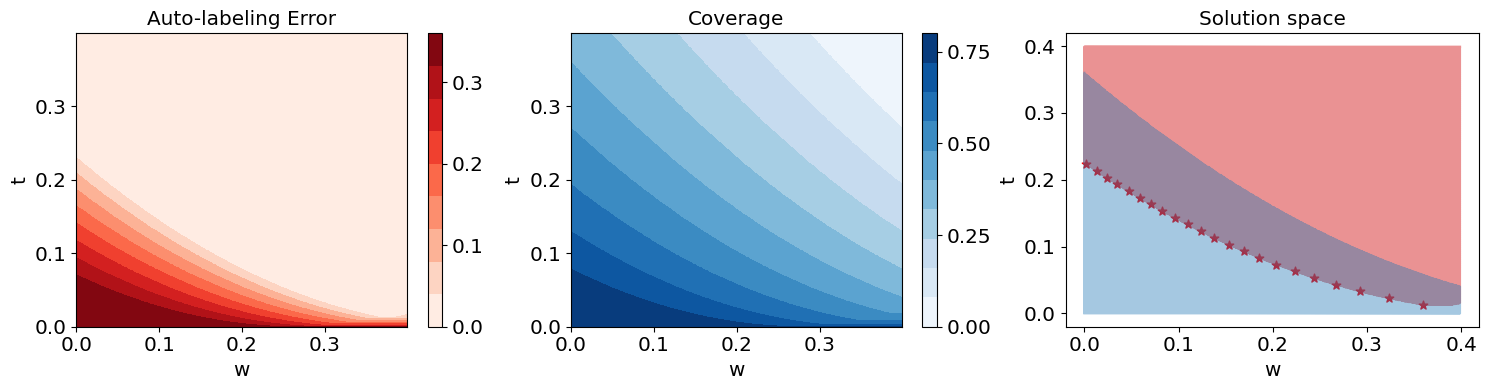

In [239]:



import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib

#font = {'family' : 'normal',
##        'weight' : 'bold',
#       'size'   : 14}

#matplotlib.rc('font', **font)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#ax = plt.figure().add_subplot(projection='2d')
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,4))

#X, Y, Z = axes3d.get_test_data(0.05)
X = ww 
Y = tt 


# Plot the 3D surface
#ax.plot_surface(X, Y, Z, alpha=0.9,cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.plot_surface(X, Y, E2, alpha=0.9, linewidth=0, antialiased=False)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
#cmap = 'YlGnBu'
#cmap = 'Blues'
cmap = 'coolwarm'

N = 10
cs1 = axs[0].contourf(X, Y, E2, N ,cmap='Reds')


#axs[0].scatter([0.375],[0.125], marker='*', color='black', s=100)

axs[0].set_xlabel('w')
axs[0].set_ylabel('t')
axs[0].set_title('Auto-labeling Error')

cs2 = axs[1].contourf(X, Y, C2, N,  cmap='Blues')
#axs[1].scatter([0.375],[0.125], marker='*', color='black',s=100)
axs[1].set_xlabel('w')
axs[1].set_ylabel('t')
axs[1].set_title('Coverage')
#ax.contour(X, Y, Z, zdir='x', offset=0, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='y', offset=0, cmap='coolwarm')

#ax.set(xlim=(0, 0.5), ylim=(0, 0.5), zlim=(0, 0.25),
#       xlabel='X', ylabel='Y', zlabel='Z')

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(cs, cax=cbar_ax)
X_ = X[E2<=0.05]
Y_ = Y[E2<=0.05]
s1=40
s2=40
#idx1 = np.random.choice(len(X_),int(len(X_)*0.02),replace=False)
#X_ = X_[idx1]
#Y_ = Y_[idx1]

#axs[2].scatter(X_,Y_,s=2,color='tab:green',alpha=1)
axs[2].plot(X_,Y_,color='tab:red',alpha=0.5)

X_ = X[(C2>=0.4)]
Y_ = Y[(C2>=0.4)]
#idx1 = np.random.choice(len(X_),int(len(X_)*0.01),replace=False)
#X_ = X_[idx1]
#Y_ = Y_[idx1]
axs[2].plot(X_,Y_,color='tab:blue',alpha=0.4)


#X_ = X[(C2>=0.4)&(E2<=0.05)]
#Y_ = Y[(C2>=0.4)&(E2<=0.05)]
#idx1 = np.random.choice(len(X_),int(len(X_)*0.01),replace=False)
#axs[2].scatter(X_[idx1],Y_[idx1], color='tab:blue',s =4)

#axs[2].scatter(X_,Y_,s=s2,color='violet',alpha=0.3,marker='*')

X_ = X[E2<=0.05]
Y_ = Y[E2<=0.05]
c = np.max(C2[E2<=0.05])
print(c)
X_ = X[ (C2==c) & (E2<=0.05)][np.arange(0,220,10)]
Y_ = Y[ (C2==c) & (E2<=0.05)][np.arange(0,220,10)]
axs[2].scatter(X_,Y_,s=s2,color='red',alpha=1.0,marker='*')
axs[2].set_xlabel('w')
axs[2].set_ylabel('t')
axs[2].set_title('Solution space')


plt.tight_layout()
plt.colorbar(cs1, ax=axs[0], ticks=[0,0.1,0.2,0.3,0.4,0.5])
plt.colorbar(cs2, ax=axs[1],ticks=[0,0.25,0.5,0.75,1.0])
plt.savefig('../../plots/sol_space.pdf',dpi=100,bbox_inches='tight' )

plt.show()


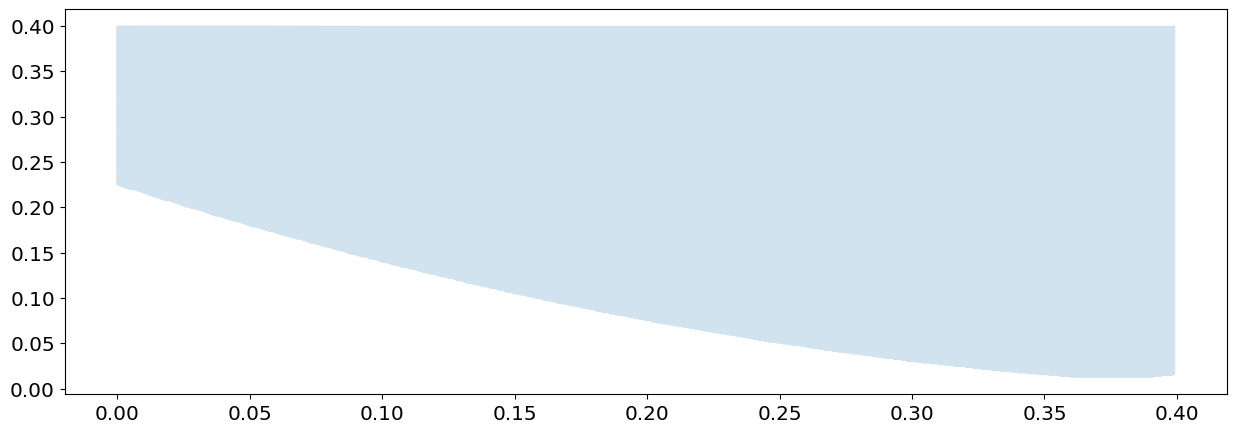

In [208]:
X_ = X[E2<=0.05]
Y_ = Y[E2<=0.05]
s1=40
s2=40
#idx1 = np.random.choice(len(X_),int(len(X_)*0.02),replace=False)
#X_ = X_[idx1]
#Y_ = Y_[idx1]

plt.plot(X_,Y_,alpha=0.2)

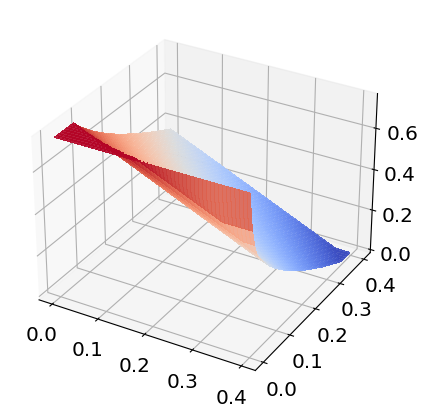

In [186]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, C2, alpha=0.9,cmap=cm.coolwarm, linewidth=0, antialiased=False)


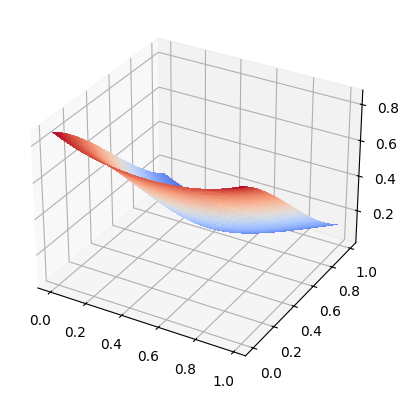

In [70]:



import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

#X, Y, Z = axes3d.get_test_data(0.05)
X = ww 
Y = tt 
Z = C

# Plot the 3D surface
ax.plot_surface(X, Y, Z, alpha=0.9,cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
#ax.contour(X, Y, Z, zdir='z', offset=0, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='x', offset=0, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='y', offset=0, cmap='coolwarm')

#ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
#       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


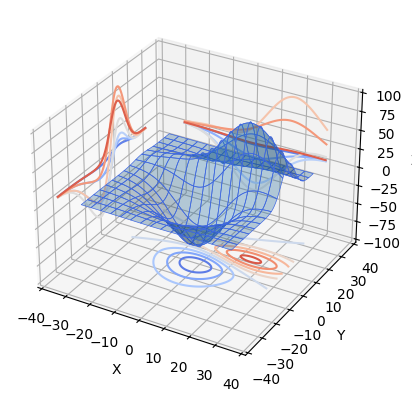

In [24]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

In [72]:
!pip install alphashape
!pip install descartes